In [1]:
# Cargar paquetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Descargar datos de CONAPO: 
# https://datos.gob.mx/busca/dataset/proyecciones-de-la-poblacion-de-mexico-y-de-las-entidades-federativas-2020-2070

# Asignar el directorio de trabajo, donde se encuentran los datos
import os
os.chdir("C:\\Users\\JoseC\\OneDrive\\Documents\\2023-2\\CONAPO\\ConDem50a19_ProyPob20a70")

In [3]:
# Importar datos de población a inicio de año (por año, edad y sexo)
df = pd.read_excel('0_Pob_Inicio_1950_2070.xlsx', sheet_name="Hoja1", usecols='A:G', nrows=744921)

In [4]:
mexico = df[(df['ENTIDAD']=="República Mexicana") & (df['AÑO']==2022)]

In [5]:
mexico['Grupos_Edad'] = pd.cut(x = mexico['EDAD'], bins=[0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 
                                                 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, max(mexico['EDAD'])],
                           right=False)

C:\Users\JoseC\AppData\Local\Temp\ipykernel_12228\1946359023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico['Grupos_Edad'] = pd.cut(x = mexico['EDAD'], bins=[0, 1, 5, 10, 15, 20, 25, 30, 35, 40,


In [6]:
print(mexico.iloc[0:10,:])

        RENGLON   AÑO             ENTIDAD  CVE_GEO  EDAD     SEXO  POBLACION  \
381920   381921  2022  República Mexicana        0     0  Hombres    1065388   
381921   381922  2022  República Mexicana        0     0  Mujeres    1025333   
381922   381923  2022  República Mexicana        0     1  Hombres    1064898   
381923   381924  2022  República Mexicana        0     1  Mujeres    1026196   
381924   381925  2022  República Mexicana        0     2  Hombres    1065492   
381925   381926  2022  República Mexicana        0     2  Mujeres    1028570   
381926   381927  2022  República Mexicana        0     3  Hombres    1069400   
381927   381928  2022  República Mexicana        0     3  Mujeres    1031407   
381928   381929  2022  República Mexicana        0     4  Hombres    1068443   
381929   381930  2022  República Mexicana        0     4  Mujeres    1030184   

       Grupos_Edad  
381920      [0, 1)  
381921      [0, 1)  
381922      [1, 5)  
381923      [1, 5)  
381924      [1

In [7]:
# Agregar la suma de población por los estratos de ENTIDAD-SEXO-GRUPOS DE EDAD
mexico2= mexico.groupby(['AÑO', 'SEXO','Grupos_Edad'], as_index=False)['POBLACION'].agg('sum')
# as_index=False -> permite que las variables de clasificación se mantengan

In [8]:
# Quedan las tres variables de identificación y el valor poblacional
print(mexico2)

     AÑO     SEXO Grupos_Edad  POBLACION
0   2022  Hombres      [0, 1)    1065388
1   2022  Hombres      [1, 5)    4268233
2   2022  Hombres     [5, 10)    5548823
3   2022  Hombres    [10, 15)    5787100
4   2022  Hombres    [15, 20)    5698644
5   2022  Hombres    [20, 25)    5652144
6   2022  Hombres    [25, 30)    5461616
7   2022  Hombres    [30, 35)    5029594
8   2022  Hombres    [35, 40)    4330585
9   2022  Hombres    [40, 45)    3737922
10  2022  Hombres    [45, 50)    3638474
11  2022  Hombres    [50, 55)    3316295
12  2022  Hombres    [55, 60)    2832242
13  2022  Hombres    [60, 65)    2249491
14  2022  Hombres    [65, 70)    1660145
15  2022  Hombres    [70, 75)    1184809
16  2022  Hombres    [75, 80)     838851
17  2022  Hombres    [80, 85)     518809
18  2022  Hombres    [85, 90)     275698
19  2022  Hombres    [90, 95)     119569
20  2022  Hombres   [95, 100)      35796
21  2022  Hombres  [100, 105)       6761
22  2022  Hombres  [105, 109)        840
23  2022  Mujere

In [9]:
# Importar el archivo de defunciones
muertes = pd.read_excel('1_Defunciones_1950_2070.xlsx', sheet_name="Hoja1", usecols='A:G', nrows=737661)

In [10]:
muertes.tail()

,RENGLON,AÑO,ENTIDAD,CVE_GEO,SEXO,EDAD,DEFUNCIONES
737655,737656,2070,Zacatecas,32,Mujeres,107,23
737656,737657,2070,Zacatecas,32,Hombres,108,25
737657,737658,2070,Zacatecas,32,Mujeres,108,15
737658,737659,2070,Zacatecas,32,Hombres,109,19
737659,737660,2070,Zacatecas,32,Mujeres,109,10


In [11]:
# Seleccionar las filas que corresponden al total nacional, hasta el 2023.
muertes2 = muertes[(muertes['ENTIDAD']=="República Mexicana") & (muertes['AÑO']==2022)]

In [12]:
# Crear intervalos de grupos quinquenales de edad.
muertes2['Grupos_Edad'] = pd.cut(x = muertes2['EDAD'], bins=[0, 1, 5, 10, 15, 20, 25, 30, 35, 40, 
                                                 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, max(muertes2['EDAD'])],
                           right=False)
    # Intervalo abierto por la derecha

C:\Users\JoseC\AppData\Local\Temp\ipykernel_12228\4129893267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muertes2['Grupos_Edad'] = pd.cut(x = muertes2['EDAD'], bins=[0, 1, 5, 10, 15, 20, 25, 30, 35, 40,


In [13]:
# Agregar la suma de población por los estratos de AÑO-SEXO-GRUPOS DE EDAD
muertes2= muertes2.groupby(['AÑO', 'SEXO','Grupos_Edad'], as_index=False)['DEFUNCIONES'].agg('sum')

In [14]:
# Base de datos de población y muertes con la misma estructura.
mexico2.shape
muertes2.shape

(46, 4)

In [15]:
# Se fusionan las tablas de población y de defunciones
tabla = pd.merge(mexico2, muertes2, how='left', on=['AÑO', 'SEXO', 'Grupos_Edad'])

In [16]:
# Se obtiene la edad de inicio de cada intervalo
tabla['x'] = tabla['Grupos_Edad'].apply(lambda intervalo: intervalo.left)

In [17]:
print(tabla)
#list(range(1950, 2024))

     AÑO     SEXO Grupos_Edad  POBLACION  DEFUNCIONES    x
0   2022  Hombres      [0, 1)    1065388        14134    0
1   2022  Hombres      [1, 5)    4268233         3088    1
2   2022  Hombres     [5, 10)    5548823         1190    5
3   2022  Hombres    [10, 15)    5787100         2382   10
4   2022  Hombres    [15, 20)    5698644         7659   15
5   2022  Hombres    [20, 25)    5652144        16228   20
6   2022  Hombres    [25, 30)    5461616        22619   25
7   2022  Hombres    [30, 35)    5029594        24549   30
8   2022  Hombres    [35, 40)    4330585        22417   35
9   2022  Hombres    [40, 45)    3737922        20023   40
10  2022  Hombres    [45, 50)    3638474        21606   45
11  2022  Hombres    [50, 55)    3316295        24746   50
12  2022  Hombres    [55, 60)    2832242        28493   55
13  2022  Hombres    [60, 65)    2249491        32342   60
14  2022  Hombres    [65, 70)    1660145        34992   65
15  2022  Hombres    [70, 75)    1184809        36482   

In [18]:
# Genera variables vacías: sobrevivientes, intervalo n, 

tabla['Tasa.Mortalidad'] = 0
tabla['n'] = 0
tabla['nax'] = 0
tabla['qx'] = 0
tabla['px'] = 0
tabla['lx'] = 0
tabla['apvLx'] = 0
tabla['Tx'] = 0
tabla['evx'] = 0

In [19]:
# Función para calcular los sobrevivientes de la Tabla de Mortalidad

def sobreviviente(df):
    for j in range(1950, 2024):
        df_anio=df[(df['AÑO']==j)]
                
        for i in range(len(df_anio)):
           
            # 1) Intervalo n por grupo de edad
            if df_anio['x'].iloc[i]==0:
                df_anio['n'].iloc[i] = 1
            elif df_anio['x'].iloc[i]==1:
                df_anio['n'].iloc[i] = 4
            else:
                df_anio['n'].iloc[i] = 5
            
            # 2) Tasa de mortalidad
            #if df_anio['x'].iloc[i] < 100:
            df_anio['Tasa.Mortalidad'].iloc[i] = (df_anio['DEFUNCIONES'].iloc[i] / df_anio['POBLACION'].iloc[i])
            #else:
            #    df_anio['Tasa.Mortalidad'].iloc[i] = 1
            
            # 2) Años Persona Vividos por grupo de edad (nax)
            # 2.1) Grupo de 0 a 1 años.
            if df_anio['x'].iloc[i]==0:
                if df_anio['Tasa.Mortalidad'].iloc[i] >= 0.107:
                    if df_anio['SEXO'].iloc[i] == "Hombres":
                        df_anio['nax'].iloc[i] = 0.330
                    else:
                        df_anio['nax'].iloc[i] = 0.350
                else:
                    if df_anio['SEXO'].iloc[i] == "Hombres":
                        df_anio['nax'].iloc[i] = 0.045 + 2.684 * df_anio['Tasa.Mortalidad'].iloc[i]
                    else:
                        df_anio['nax'].iloc[i] = 0.053 + 2.8 * df_anio['Tasa.Mortalidad'].iloc[i]
            
            # 2.2) Grupo de 1 a 5 años.
            elif df_anio['x'].iloc[i]==1:
                if df_anio['Tasa.Mortalidad'].iloc[i-1] >= 0.107:
                    if df_anio['SEXO'].iloc[i] == "Hombres":
                        df_anio['nax'].iloc[i] = 1.352
                    else:
                        df_anio['nax'].iloc[i] = 1.361
                else:
                    if df_anio['SEXO'].iloc[i] == "Hombres":
                        df_anio['nax'].iloc[i] = 1.651 - 2.816 * df_anio['Tasa.Mortalidad'].iloc[i]
                    else:
                        df_anio['nax'].iloc[i] = 1.522 - 1.518 * df_anio['Tasa.Mortalidad'].iloc[i]
                        
            # 2.3) Grupos de 5 o más años.
            else:
                df_anio['nax'].iloc[i] = df_anio['n'].iloc[i] / 2
            
            # 3) Probabilidad de fallecer a la edad x (Preston, Heuveline & Guillot, 2001, p. 43 y sig.)
            #if df_anio['x'].iloc[i] < 105 :
                #FUNCIÓN 3.1 CON BASE EN nax
                #df_anio['qx'].iloc[i] = (df_anio['n'].iloc[i] * df_anio['Tasa.Mortalidad'].iloc[i]) / ( 1 + (df_anio['n'].iloc[i] - df_anio['nax'].iloc[i]) * df_anio['Tasa.Mortalidad'].iloc[i])
                #Función 3.2 con base en nmx
            df_anio['qx'].iloc[i] = (2 * df_anio['n'].iloc[i] * df_anio['Tasa.Mortalidad'].iloc[i] ) / (2 + df_anio['n'].iloc[i] * df_anio['Tasa.Mortalidad'].iloc[i])
            #else:
            #    df_anio['qx'].iloc[i] = 1
                
            if df_anio['qx'].iloc[i] < 1:
                df_anio['qx'].iloc[i] = df_anio['qx'].iloc[i]
            else:
                df_anio['qx'].iloc[i] = 1
            # 4) Probabilidad de sobrevivir a la edad x
            df_anio['px'].iloc[i] = 1 - df_anio['qx'].iloc[i]
            
            # 5) Cálculo de Sobrevivientes a la edad exacta x
            if df_anio['x'].iloc[i]==0:
                df_anio['lx'].iloc[i] = 1000000
            else:
                df_anio['lx'].iloc[i] = round(df_anio['lx'].iloc[i-1]*(1-df_anio['qx'].iloc[i-1]))
            
            # 6) Cálculo de apv_Lx = (sobrevivientes en x+n * n) + (fallecidos antes de x+n * años vividos en promedio)
            df_anio['apvLx'].iloc[i] = round((df_anio['lx'].iloc[i] - df_anio['lx'].iloc[i] * df_anio['qx'].iloc[i]) * df_anio['n'].iloc[i]) + round((df_anio['lx'].iloc[i] * df_anio['qx'].iloc[i] * df_anio['nax'].iloc[i]), 1 )
            
        # 7) Cálculo de Tx
        # Una vez obtenida la tabla de vida, tomo la suma de Lx y descuento los APV de cada grupo
        for i in reversed(range(len(df_anio))):
            if df_anio['x'].iloc[i]==105:
                df_anio['Tx'].iloc[i] = df_anio['apvLx'].iloc[i]
            else:
                df_anio['Tx'].iloc[i] = df_anio['apvLx'].iloc[i] + df_anio['Tx'].iloc[i+1]
            #else:
            #    df_anio['Tx'].iloc[i] = 0
                
        # 8) Cálculo de la Esperanza de Vida
            df_anio['evx'].iloc[i] = round(df_anio['Tx'].iloc[i] / df_anio['lx'].iloc[i], 1)
                
        # 9) Concatenar las tablas de cada año
        if j==1950:
            new = df_anio
        else:    
            new = pd.concat([new, df_anio], axis=0)
    return(new)
         

In [20]:
nuevo = sobreviviente(tabla)

C:\Users\JoseC\AppData\Local\Temp\ipykernel_12228\2235821195.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anio['n'].iloc[i] = 1
C:\Users\JoseC\AppData\Local\Temp\ipykernel_12228\2235821195.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anio['Tasa.Mortalidad'].iloc[i] = (df_anio['DEFUNCIONES'].iloc[i] / df_anio['POBLACION'].iloc[i])
C:\Users\JoseC\AppData\Local\Temp\ipykernel_12228\2235821195.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [21]:
nuevo.head()
#print(nuevo.iloc[23:46,7:15])

,AÑO,SEXO,Grupos_Edad,POBLACION,DEFUNCIONES,x,Tasa.Mortalidad,n,nax,qx,px,lx,apvLx,Tx,evx
0,2022,Hombres,"[0, 1)",1065388,14134,0,0.013267,1,0.080607,0.013179,0.986821,1000000,987883.3,72013707.1,72.0
1,2022,Hombres,"[1, 5)",4268233,3088,1,0.000723,4,1.648963,0.002890,0.997110,986821,3940579.3,71025823.8,72.0
2,2022,Hombres,"[5, 10)",5548823,1190,5,0.000214,5,2.500000,0.001072,0.998928,983969,4917208.4,67085244.5,68.2
3,2022,Hombres,"[10, 15)",5787100,2382,10,0.000412,5,2.500000,0.002056,0.997944,982914,4909518.0,62168036.1,63.2
4,2022,Hombres,"[15, 20)",5698644,7659,15,0.001344,5,2.500000,0.006698,0.993302,980893,4888040.9,57258518.1,58.4


In [136]:
nuevo.to_clipboard()

In [22]:
x = nuevo.x[(nuevo['AÑO']==2022) & (nuevo['SEXO']=="Hombres")]
y1 = nuevo.evx[(nuevo['AÑO']==2022) & (nuevo['SEXO']=="Hombres")]
y2 = nuevo.evx[(nuevo['AÑO']==2022) & (nuevo['SEXO']=="Mujeres")]


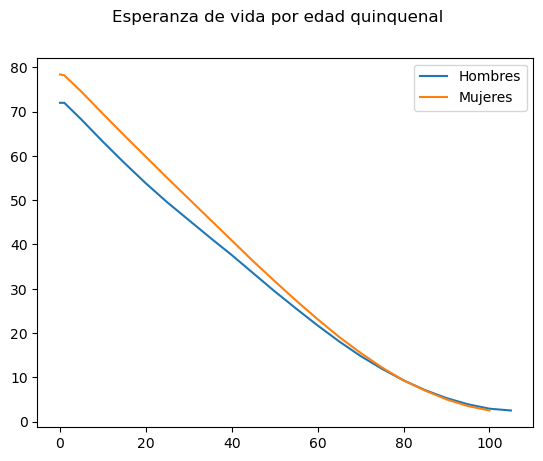

In [23]:
fig, axs = plt.subplots()
fig.suptitle('Esperanza de vida por edad quinquenal')
axs.plot(x, y1, label='Hombres')
axs.plot(x, y2, label='Mujeres')

#Legend
axs.legend()

plt.show()

In [24]:
#Descarga de datos y crear repositorio en directorio de trabajo
#Fuente: https://www.inegi.org.mx/contenidos/programas/natalidad/datosabiertos/2022/conjunto_de_datos_natalidad_2022_csv.zip
df = pd.read_csv('C:\\Users\\JoseC\\OneDrive\\Documents\\2023-2\\Fecundidad\\natalidad_2022\\conjunto_de_datos\\conjunto_de_datos_natalidad_2022.csv')  

In [25]:
#nacim = df.query('sexo == 2' and 'edad_madn < 99')
nacim = df[(df['sexo']==2) & (df['edad_madn']<99)]
nacim = nacim[['edad_madn']]

In [26]:
nacim['Grupos_Edad'] = pd.cut(x = nacim['edad_madn'], bins=[15, 20, 25, 30, 35, 40, 45, 50], right=False)
nacim2= nacim.groupby(['Grupos_Edad'], as_index=False).count()

In [27]:
nacim2.shape
print(nacim2)

  Grupos_Edad  edad_madn
0    [15, 20)     126646
1    [20, 25)     237784
2    [25, 30)     227793
3    [30, 35)     165932
4    [35, 40)      83992
5    [40, 45)      21909
6    [45, 50)       1976


In [28]:
#Poblaciones estables
femen = nuevo.iloc[23:46, 2:15]
femen = femen[femen['x'].between(15, 45)]
femen = femen[['Grupos_Edad', 'x', 'POBLACION', 'apvLx']]
femen['apvLx'] = femen['apvLx']/1000000
print(femen)

   Grupos_Edad   x  POBLACION     apvLx
27    [15, 20)  15    5577227  4.914271
28    [20, 25)  20    5583731  4.898172
29    [25, 30)  25    5473009  4.876659
30    [30, 35)  30    5197783  4.850406
31    [35, 40)  35    4784339  4.818674
32    [40, 45)  40    4405008  4.778730
33    [45, 50)  45    4200185  4.724790


In [108]:
# Se fusionan las tablas de mortalidad y de nacimientos femeninos
estable = pd.merge(femen, nacim2, how='left', on=['Grupos_Edad'])
# Tasa de macimientos femeninos por mujer, según grupo de edad
estable['5ma'] = (estable['edad_madn'] / estable['POBLACION'])
# Tasa Neta de Reproducción
estable['tnr'] = (estable['5ma'] * estable['apvLx'])
print(estable)

  Grupos_Edad   x  POBLACION     apvLx  edad_madn       5ma       tnr
0    [15, 20)  15    5577227  4.914271     126646  0.022708  0.111592
1    [20, 25)  20    5583731  4.898172     237784  0.042585  0.208589
2    [25, 30)  25    5473009  4.876659     227793  0.041621  0.202972
3    [30, 35)  30    5197783  4.850406     165932  0.031924  0.154842
4    [35, 40)  35    4784339  4.818674      83992  0.017556  0.084595
5    [40, 45)  40    4405008  4.778730      21909  0.004974  0.023768
6    [45, 50)  45    4200185  4.724790       1976  0.000470  0.002223


In [110]:
tnr = round(estable['tnr'].sum(), 3)
print(tnr)

0.789


In [116]:
import math as mt
r0 = round(mt.log(tnr) / 27, 5)
print(r0)

-0.00878


In [ ]:
estable['r0']=0
estable['r1']=0
estable['r2']=0
estable['r3']=0

In [ ]:
def busca_r(tabla):
    for i in range(len(tabla)):
        tabla['r0'].iloc[i] = round(mt.log((tabla['tnr'].sum())) / 27, 5)